### Student Information
Name: Darren

Student ID: 114062425

GitHub ID: Artisme

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### 1. Data Loading and Initial Exploration
First, we'll import the necessary libraries and load our dataset into a pandas DataFrame. Then, we'll take a quick look at its structure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import math
from sklearn.feature_extraction.text import CountVectorizer

# load dataset
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

# check first few rows
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [2]:
# dataset summary
df.info()

# shape
print("\n### Dataset Shape ###")
print(f"{df.shape}")

print(f"\n\n{'-'*85}\n")

# statistic description
print(df.describe())

print(f"\n\n{'-'*85}\n")

# distribution of label
print(df['label'].value_counts())

print(f"\n\n{'-'*85}\n")

# check which subreddit are most data comes from
print(df['subreddit'].value_counts().head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB

### Dataset Shape ###
(847, 16)


----------------------

### 2. Data Cleaning
Real-world data is often messy. We need to handle missing values and duplicates to ensure our analysis is accurate.

In [3]:
print(f"Original rows: {len(df)}")

# check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# drop columns that are not useful
columns_to_drop = ['downvotes', 'upvote_ratio']
df.drop(columns=columns_to_drop, inplace=True)

# drop rows where text or label columns are empty
df.dropna(subset=['text', 'label'], inplace=True)

print(f"\nrows after dropping some: {len(df)}")

# check and remove duplicate posts based on text
num_duplicates = df.duplicated(subset=['text']).sum()
print(f"duplicate text entries: {num_duplicates}")
df.drop_duplicates(subset=['text'], keep='first', inplace=True)

print(f"after removing duplicates: {len(df)}")

Original rows: 847
Missing values before cleaning:
type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

rows after dropping some: 847
duplicate text entries: 23
after removing duplicates: 824


when we checked for missing values, the downvotes and upvote_ratio columns was missing 783 values, but we only have 847 rows in total

If we dropped every row that had any missing value, we would of lost almost all our data. We gonna have like 64 rows left, which is not enough to do anything useful

those two columns are not very important for our main goal, which is to analyze the text sentiment from the text and labelcolumns. So, it make more sense to just get rid of those two columns and keep all the rows that still has text data.

sometimes same post is just spam or from a bot. its a good decision to remove these types of data also. it can skew our results if we dont.

### 3. Data Transformation
To make the sentiment labels easier to understand, we can add a new column with ('Positive', 'Neutral', 'Negative')

In [4]:
def map_sentiment(label):
    if label == 1.0:
        return 'Positive'
    elif label == 0.0:
        return 'Neutral'
    else: # -1.0
        return 'Negative'

df['sentiment_name'] = df['label'].apply(map_sentiment)

df[['text', 'sentiment_name']].head()

,text,sentiment_name
0,Calls on retards,Negative
1,Stunt as in like why did they even make a big ...,Neutral
2,Seeing lots of red in the ticker.,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,Positive
4,He didn’t say thank you.,Negative


### 4. Data Visualization

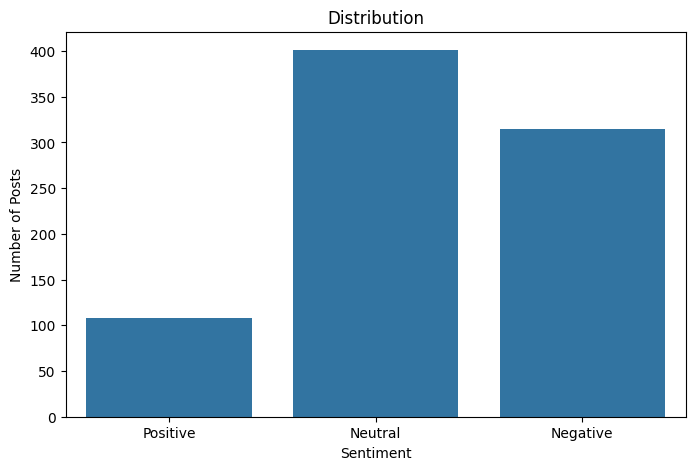

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_name', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

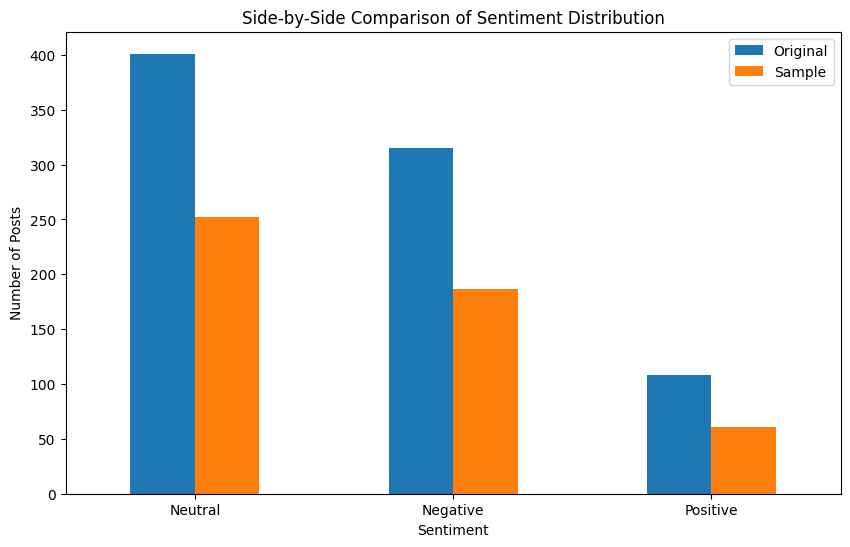

In [6]:
# create sample
df_sample = df.sample(n=500, random_state=1)

# get the counts of each
original_counts = df['sentiment_name'].value_counts().rename('Original')
sample_counts = df_sample['sentiment_name'].value_counts().rename('Sample')

comparison_df = pd.concat([original_counts, sample_counts], axis=1)

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Side-by-Side Comparison of Sentiment Distribution')
plt.ylabel('Number of Posts')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

In [7]:
# lets check for the changes between df and df_sample

# 1. The number of rows is different
print(f"Original df length: {len(df)}")
print(f"Sample df length: {len(df_sample)}")
print("\n")

# 2. The index is all mixed up now because it was a random sample
# the original index goes 0, 1, 2, 3...
# the sample index is random, like 413, 113, 277...
print("--- Original Index ---")
print(df.index[:5])
print("\n--- Sample Index ---")
print(df_sample.index[:5])
print("\n")

# 3. Because the index is random, the data is also in a random order
print("--- First 3 rows of Original df ---")
print(df['text'].head(3))
print("\n--- First 3 rows of Sample df ---")
print(df_sample['text'].head(3))

Original df length: 824
Sample df length: 500


--- Original Index ---
Index([0, 1, 2, 3, 4], dtype='int64')

--- Sample Index ---
Index([240, 512, 747, 275, 419], dtype='int64')


--- First 3 rows of Original df ---
0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
Name: text, dtype: object

--- First 3 rows of Sample df ---
240    Also China: We are embargoing strategic minera...
512      moving money quickly from us to his own pockets
747    Ask our SC how they feel about it: “Way to go ...
Name: text, dtype: object


### 5. Feature Creation: Tokenization and Document-Term Matrix
first we break it down into tokens then convert our text data into a document-term matrix

In [8]:
nltk.download('punkt')

df['unigrams'] = df['text'].apply(nltk.word_tokenize)

print("example:")
print(df[['text', 'unigrams']].head())

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


example:
                                                text  \
0                                   Calls on retards   
1  Stunt as in like why did they even make a big ...   
2                  Seeing lots of red in the ticker.   
3  Vision Marine Technologies Inc. is rewriting t...   
4                           He didn’t say thank you.   

                                            unigrams  
0                               [Calls, on, retards]  
1  [Stunt, as, in, like, why, did, they, even, ma...  
2        [Seeing, lots, of, red, in, the, ticker, .]  
3  [Vision, Marine, Technologies, Inc., is, rewri...  
4               [He, didn, ’, t, say, thank, you, .]  


In [9]:
# CountVectorizer to create a document-term matrix
# counts the occurrences of each word in each document
count_vect = CountVectorizer(
    # stop_words='english',
    # max_df=0.95,  # ignore words that show more than 85% of the docs
    # min_df=3,     # word have to be in at least 3 docs
    # token_pattern=r'\b[a-zA-Z]{3,}\b' # 3 letter or more words
)
X_counts = count_vect.fit_transform(df['text'])

print(f"Shape of the matrix: {X_counts.shape}")
print("(Documents, Unique Words)")

Shape of the matrix: (824, 4346)
(Documents, Unique Words)


#### Visualizing the Matrix Sparsity
using heatmap to check how sparse the matrix is

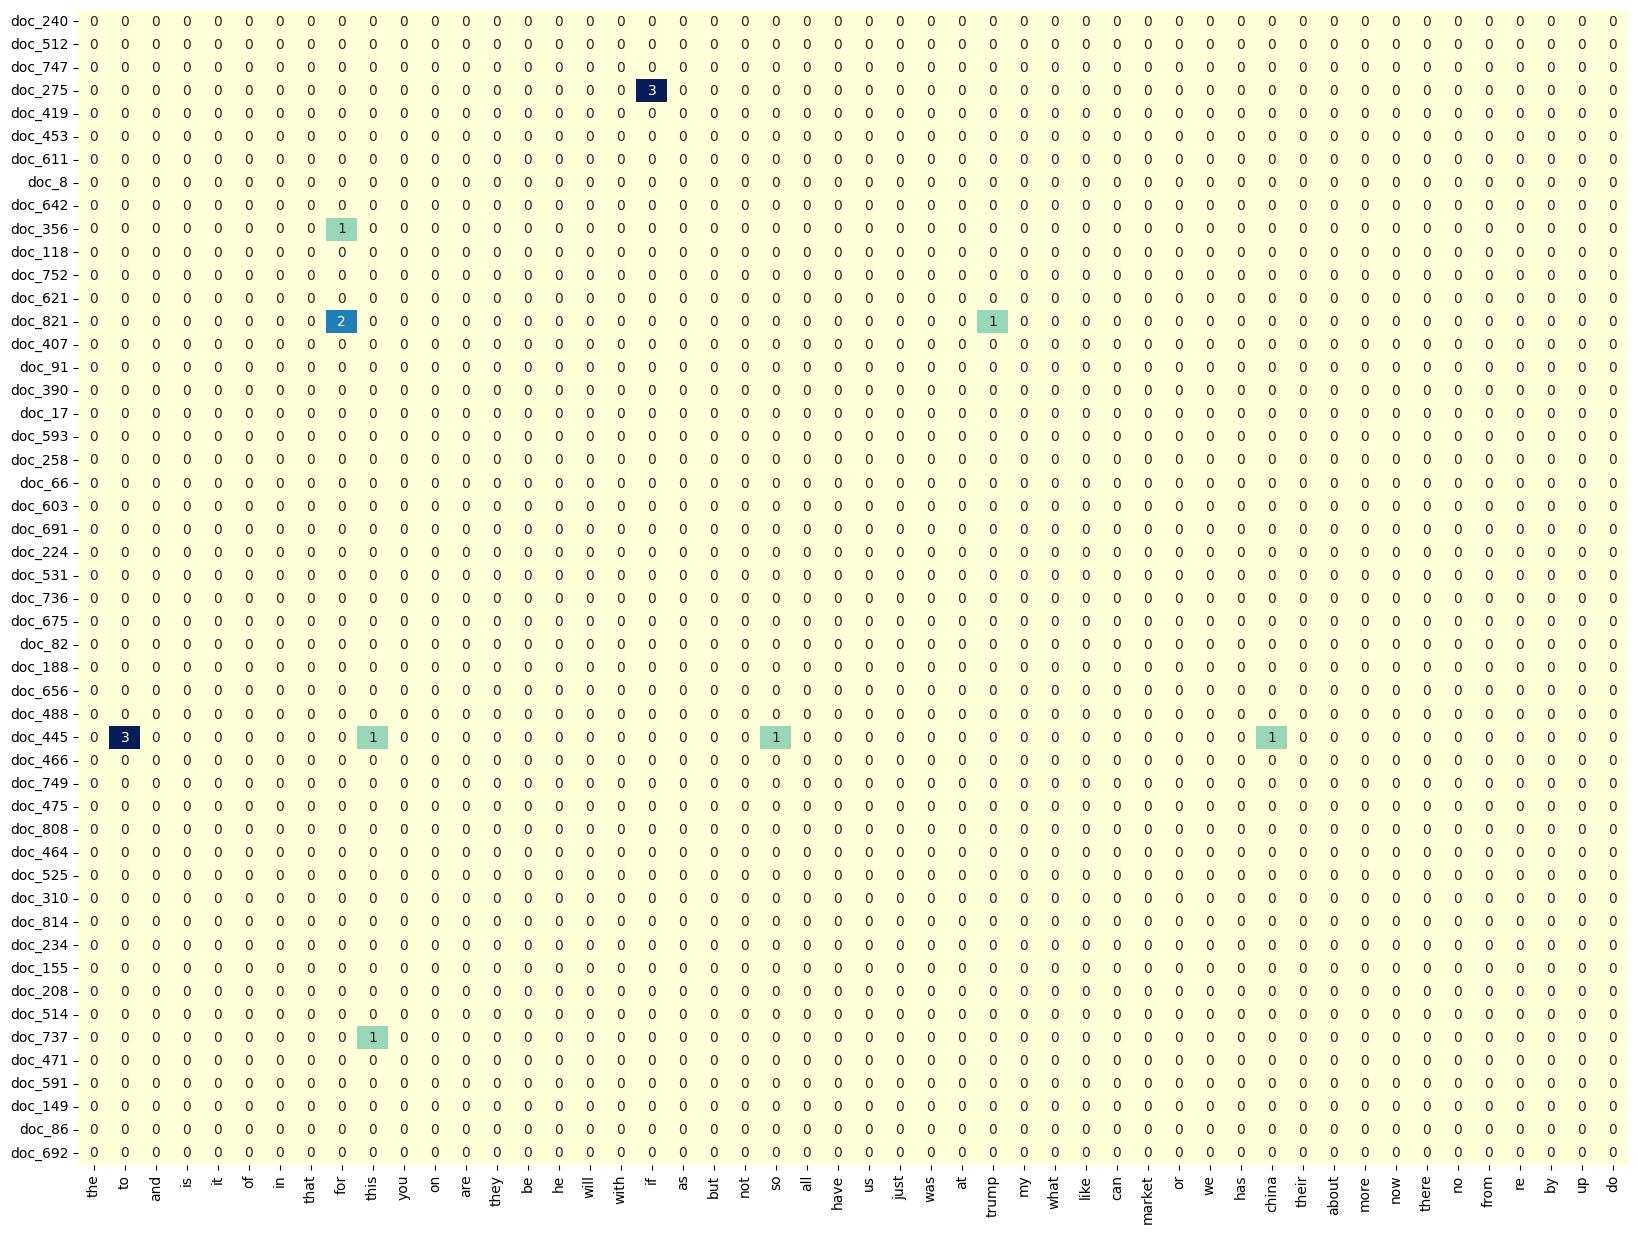

In [10]:
# frandom document to 50 top frequent terms
random_sample = df.sample(n=50, random_state=1)
sample_indices = random_sample.index
doc_names = [f"doc_{i}" for i in sample_indices]
top_term_indices = np.argsort(X_counts.sum(axis=0).A1)[::-1][:50]
heatmap_df = pd.DataFrame(
    X_counts[:50, :50].toarray(),
    index=doc_names,
    columns=count_vect.get_feature_names_out()[top_term_indices],
)
plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_df, cmap="YlGnBu", annot=True, cbar=False)
plt.show()

using spy plot, good for sparse matrix, use dark background for clearer view

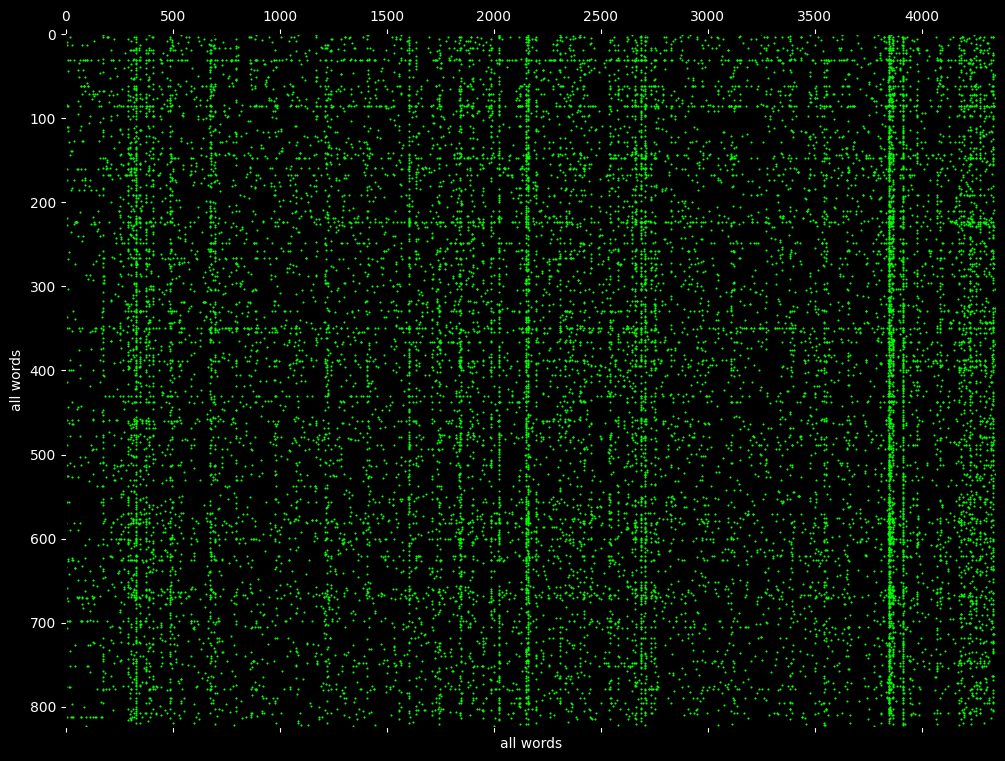

In [11]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.set_facecolor('black')
fig.set_facecolor('black')

ax.spy(X_counts, markersize=0.5, aspect='auto', color='lime')

ax.set_xlabel('all words', color='white')
ax.set_ylabel('all words', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()

In [12]:
print(pd.DataFrame({'Term': count_vect.get_feature_names_out(), 'Frequency': np.asarray(X_counts.sum(axis=0))[0]}).sort_values(by='Frequency', ascending=False).head(5).to_string(index=False))

Term  Frequency
 the        886
  to        557
 and        475
  is        390
  it        341


### 6. Attribute Transformation: Term Frequencies

In [13]:
# To show how to get the second "1" based on Ex 10

doc_vector = X_counts[0].toarray()

indices_of_ones = np.where(doc_vector[0] == 1)[0]
print(f"{indices_of_ones}")

# first two indices
first_word_index = indices_of_ones[0]
second_word_index = indices_of_ones[1]

# Get the actual words from the vectorizer's vocabulary
word1 = count_vect.get_feature_names_out()[first_word_index]
word2 = count_vect.get_feature_names_out()[second_word_index]

print(f"The word at index {first_word_index} is: '{word1}'")
print(f"The word at index {second_word_index} is: '{word2}'")

[ 692 2706 3248]
The word at index 692 is: 'calls'
The word at index 2706 is: 'on'


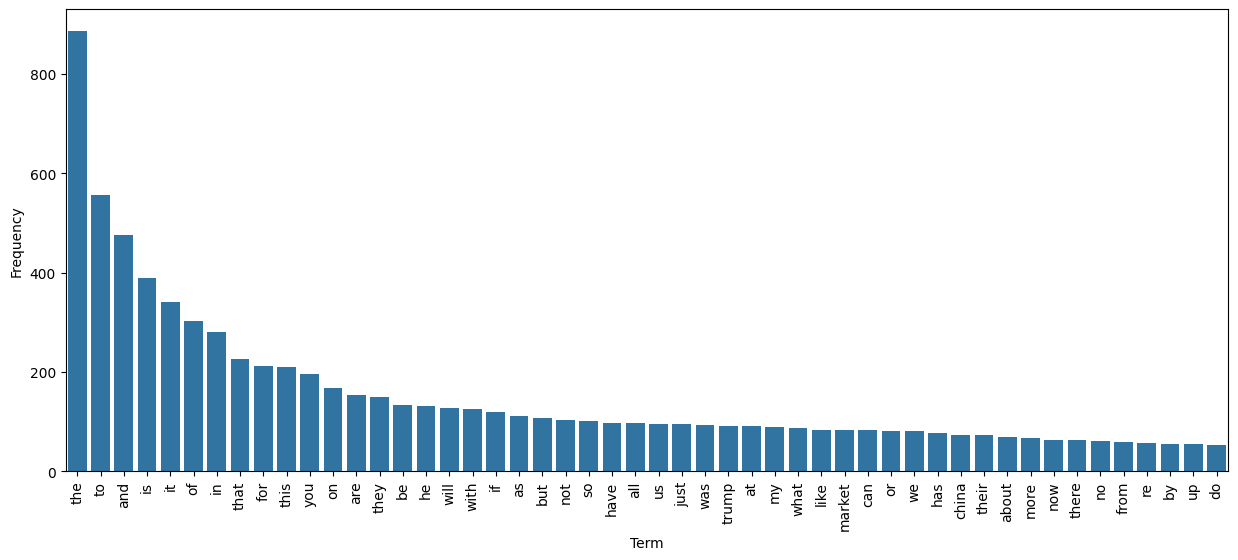

In [14]:
# sum words
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

term_freq_df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(), 
    'Frequency': term_frequencies
})

# sort by freq
term_freq_df_sorted = term_freq_df.sort_values(by='Frequency', ascending=False)

# top 50 most frequent
plt.figure(figsize=(15, 6))
sns.barplot(x='Term', y='Frequency', data=term_freq_df_sorted.head(50))
plt.xticks(rotation=90)
plt.show()

In [15]:
import plotly.express as px

fig = px.bar(term_freq_df_sorted.head(300), x="Term", y="Frequency")

fig.show()

#### Log Transformation
The frequency distribution is heavily skewed. Applying a log transformation helps to visualize the differences between less frequent words more clearly.

In [16]:
# Apply a log transformation to the frequency
# We add 1 to avoid taking the log of zero
term_freq_df_sorted['LogFrequency'] = term_freq_df_sorted['Frequency'].apply(lambda x: math.log(x + 1))

# Plot the log-transformed frequencies of the top 50 terms
fig = px.bar(term_freq_df_sorted.head(300), x="Term", y="LogFrequency")

fig.show()

---
End of Phase 1 process on the new dataset.

# Phase 2

Finding frequent patterns

ok, so now we follow the master notebook process
first we need a full document-term matrix (tdm) for the whole dataset
we'll use the 'X_counts' and 'count_vect' from phase 1

In [17]:
# this is the main tdm for later (PCA, classification)
# 'X_counts' and 'count_vect' are from Phase 1
main_terms = count_vect.get_feature_names_out() 

# make it a dense dataframe
tdm_df = pd.DataFrame(X_counts.toarray(), columns=main_terms, index=df.index)
tdm_df.head()

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


now for the frequent pattern mining, we gotta split the data by category (sentiment)

In [18]:
#Create separate DataFrames for each category
categories = df['sentiment_name'].unique() # Get unique category labels
category_dfs = {} # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    # we use 'text' since that's what the master notebook does
    category_dfs[category] = df[df['sentiment_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df_cat):
    # use a new vectorizer, just like the master notebook
    count_vect_cat = CountVectorizer()
    X_counts_cat = count_vect_cat.fit_transform(df_cat['text'])
    
    # Get the unique words from the vectorizer
    words = count_vect_cat.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts_cat.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}

for category in categories:
    print(f"Processing category: {category}")
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

filt_term_document_dfs['Positive']

Processing category: Negative
Processing category: Neutral
Processing category: Positive


,06,10,100,116,12,153,1728,18,1981,1992,...,year,years,yelling,yes,yesterday,yields,yikes,you,your,zero
0,0,0,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


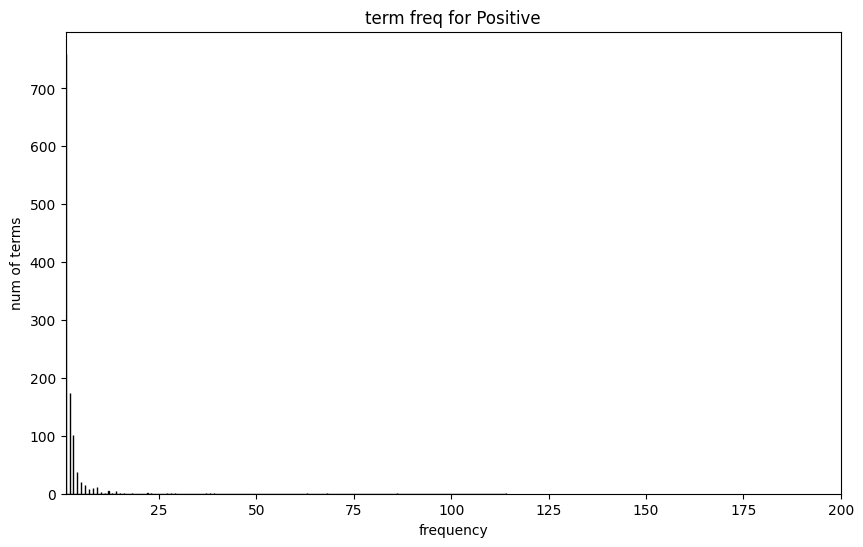

In [19]:
# let's plot the frequency for one category
category_name='Positive'
word_counts = filt_term_document_dfs[category_name].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'term freq for {category_name}')
plt.xlabel('frequency')
plt.ylabel('num of terms')
plt.xlim(1, 200)
plt.show()

just like in the master, most words show up very infrequently
we'll filter out the top 5% (stopwords that got through) and bottom 1% (super rare words)

In [20]:
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    
    sorted_words = word_sums.sort_values()
    
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # make sure we don't try to remove 0 words
    if bottom_n == 0 and top_n == 0:
        return term_document_df # nothing to remove
    
    bottom_words = sorted_words.head(bottom_n)
    top_words = sorted_words.tail(top_n)
    words_to_remove = pd.concat([bottom_words, top_words]).index
    
    print(f'Bottom {bottom_percent*100}% words: \n{bottom_words}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{top_words}') #Here we print which words correspond to the top percentage we filter
    
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[0]}:")
term_document_dfs[categories[0]]


For category Negative we filter the following words:
Bottom 1.0% words: 
200         1
200k        1
2011        1
2021        1
2025        1
ya          1
yea         1
yields      1
1934        1
1947        1
1953        1
1961        1
1969        1
1973        1
1974        1
1999        1
woefully    1
woke        1
150         1
16          1
160         1
dtype: int64
Top 5.0% words: 
these         11
after         11
literally     12
me            12
shit          12
            ... 
it           147
is           178
and          193
to           231
the          409
Length: 109, dtype: int64

For category Neutral we filter the following words:
Bottom 1.0% words: 
multi         1
mornings      1
mou           1
mouth         1
moved         1
moves         1
movies        1
mpm           1
msci          1
momentum      1
multikine     1
multiple      1
muscles       1
mutual        1
myers         1
nacs          1
nah           1
name          1
moderators    1
models      

,000,02,03,10,100,1000,10000,11,12,13,...,x200b,yeah,year,years,yet,yippee,yo,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [21]:
# Answer here
"""
Similarities
---
Both the top and bottom filters are basically for removing noise
The Top 5 percent lists are almost identical for the most common words
All three categories filtered out the, and, to, is, it
This makes total sense, because these are stopwords and they dont tell us anything about the category
They are just common english words

The Bottom 1 percent lists are also similar in what they do
They all filter out words that only appeared one time
These are probably typos, random numbers, or just words that are so rare they arent useful for a model
So, all categories are filtering out the most common and the most rare words

Differences
---
The main difference is in the Top 5 percent lists
The Positive category is filtering out a lot of words that seem really important for that topic
Words like market, lithium, silver, aviation, technology, and good are being removed
This means those words are super common inside the positive messages, so much so that the filter thinks they are stopwords
This could be a problem, because those words are probably the best clues for finding a positive message

The Negative category also did this a little bit
It filtered out the word shit
This is a strong negative word, but it was so common in the negative messages that it got removed

The Neutral categorys top list was the most "normal"
It was pretty much just standard stopwords like go, his, most, etc
This tells me the neutral category is more generic and doesnt have strong topic words like the positive one does

For the Bottom 1 percent lists, the Negative category had a ton of numbers and years (like 2021, 1947)
The other two had more of a mix of random words and maybe some jargon (like msci or multikine)
"""

'\nSimilarities\n---\nBoth the top and bottom filters are basically for removing noise\nThe Top 5 percent lists are almost identical for the most common words\nAll three categories filtered out the, and, to, is, it\nThis makes total sense, because these are stopwords and they dont tell us anything about the category\nThey are just common english words\n\nThe Bottom 1 percent lists are also similar in what they do\nThey all filter out words that only appeared one time\nThese are probably typos, random numbers, or just words that are so rare they arent useful for a model\nSo, all categories are filtering out the most common and the most rare words\n\nDifferences\n---\nThe main difference is in the Top 5 percent lists\nThe Positive category is filtering out a lot of words that seem really important for that topic\nWords like market, lithium, silver, aviation, technology, and good are being removed\nThis means those words are super common inside the positive messages, so much so that the f

time to make the transactional databases for pami

In [22]:
from PAMI.extras.convert.DF2DB import DF2DB

for category in term_document_dfs:
    category_safe = category.replace('.', '_')
    
    obj = DF2DB(term_document_dfs[category]) 
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

now let's look at the stats for our new databases

Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.815873015873017
Maximum Transaction Size : 132
Standard Deviation Transaction Size : 13.153950536399085
Variance in Transaction Sizes : 173.5774542513396
Sparsity : 0.994269702708112


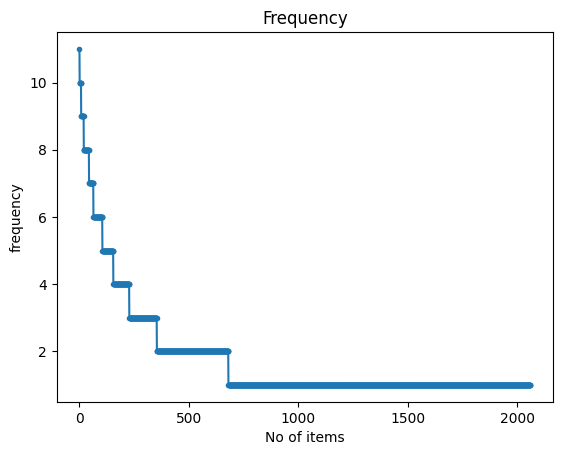

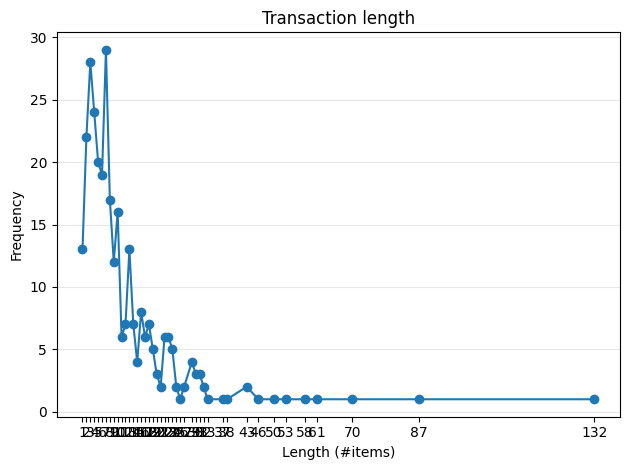

In [23]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_Negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 393
Number of items : 2586
Minimum Transaction Size : 1
Average Transaction Size : 10.844783715012722
Maximum Transaction Size : 199
Standard Deviation Transaction Size : 18.56667592701144
Variance in Transaction Sizes : 345.6008464454484
Sparsity : 0.9958063481380461


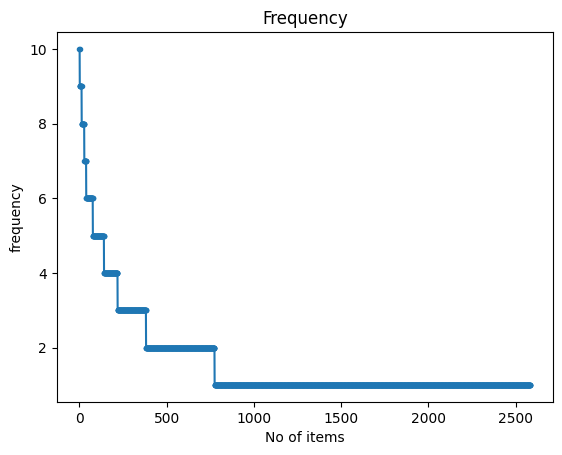

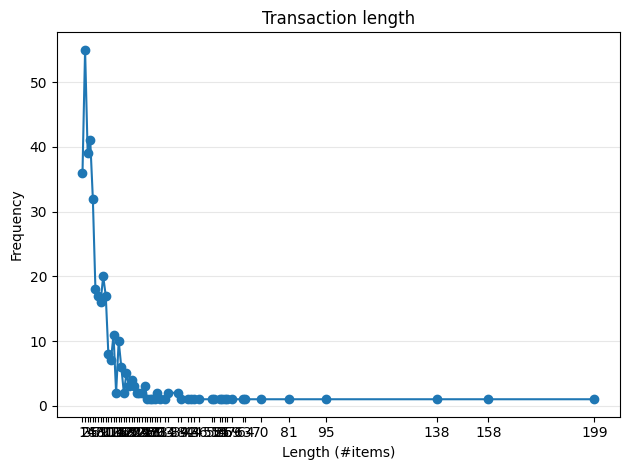

In [24]:
obj = tds.TransactionalDatabase('td_freq_db_Neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 107
Number of items : 1103
Minimum Transaction Size : 1
Average Transaction Size : 14.392523364485982
Maximum Transaction Size : 91
Standard Deviation Transaction Size : 16.849391685597666
Variance in Transaction Sizes : 286.5803209310527
Sparsity : 0.9869514747375467


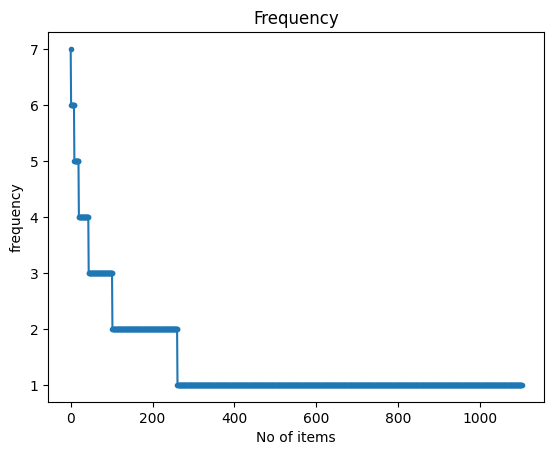

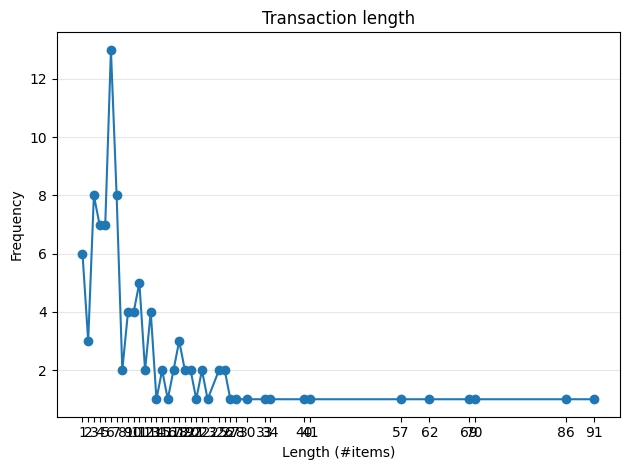

In [25]:
obj = tds.TransactionalDatabase('td_freq_db_Positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Frequent Patterns

ok so the graphs show most transactions are small
the smallest category 'Positive' has 107 transactions
i'll pick a minSup of 3, which is about 2.8% of that smallest group
this should find patterns that are at least a little bit common

In [26]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3

obj1 = alg.FPGrowth(iFile='td_freq_db_Negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_Negative = obj1.getPatternsAsDataFrame()
print(f'Patterns for Negative: {len(frequentPatternsDF_Negative)}') 

obj2 = alg.FPGrowth(iFile='td_freq_db_Neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_Neutral = obj2.getPatternsAsDataFrame()
print(f'Patterns for Neutral: {len(frequentPatternsDF_Neutral)}') 

obj3 = alg.FPGrowth(iFile='td_freq_db_Positive.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_Positive = obj3.getPatternsAsDataFrame()
print(f'Patterns for Positive: {len(frequentPatternsDF_Positive)}')

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Patterns for Negative: 399
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Patterns for Neutral: 424
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Patterns for Positive: 110


now we find the patterns that are unique to each category

In [27]:
dfs_patterns = [frequentPatternsDF_Negative, frequentPatternsDF_Neutral, frequentPatternsDF_Positive]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df_pat in dfs_patterns:
    for pattern in df_pat['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(df_pat) for df_pat in dfs_patterns if 'Patterns' in df_pat.columns)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df_pat in dfs_patterns:
    if 'Patterns' in df_pat.columns:
        filtered_df = df_pat[df_pat['Patterns'].isin(unique_patterns)]
        filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
if filtered_dfs:
    final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
    final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)
    print(final_pattern_df)
else:
    print("No patterns found to merge")
    final_pattern_df = pd.DataFrame(columns=['Patterns', 'Support']) # create empty df

# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns  Support
496       down       10
232      great        9
229       last        9
228        off        9
231       week        9
..         ...      ...
286   assuming        3
285     sector        3
284     energy        3
299     mostly        3
279  contracts        3

[558 rows x 2 columns]
Number of patterns discarded: 375


now we add these patterns as new columns to our main tdm

In [28]:
# this analyzer matches the one used to find the patterns
pattern_analyzer = CountVectorizer().build_analyzer()

# apply it to the raw text to get matching tokens
# we use set() for fast subset checking
df['pattern_tokens'] = df['text'].apply(lambda x: set(pattern_analyzer(x)))

pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = df['pattern_tokens'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Concatenate the original TDM (from phase 1) and the pattern matrix
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,set,possible,point,future\tinvestors,future,assuming,sector,energy,mostly,contracts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases.

In [29]:
# Answer Here

import time
from PAMI.frequentPattern.topk.FAE import FAE as FAETopK
from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth

# we'll use the 'Positive' category csv as our example
db_filepath = 'td_freq_db_Positive.csv'

print("--- Running FAE Top-K Trials ---")
k_values = [100, 150, 200]
fae_results = {}

for k in k_values:
    print(f"Running FAE Top-K with k={k}...")
    start_time = time.time()
    
    fae = FAETopK(iFile=db_filepath, k=k)
    fae.mine()
    
    end_time = time.time()
    runtime = end_time - start_time
    
    patterns = fae.getPatterns()
    fae_results[k] = {'runtime': runtime, 'patterns': patterns}
    
    print(f"  Runtime: {runtime:.4f} seconds")
    print(f"  Patterns found: {len(patterns)}")
    print("  Sample patterns (first 5):")
    for pattern, support in list(patterns.items())[:5]:
        print(f"    {pattern} : {support}")
    print("-" * 20)

# --- MaxFPGrowth Trials ---
print("\n--- Running MaxFPGrowth Trials ---")
min_sup_values = [3, 6, 9]
maxfp_results = {}

for min_sup in min_sup_values:
    print(f"Running MaxFPGrowth with minSup={min_sup}...")
    start_time = time.time()
    
    max_fp = MaxFPGrowth(iFile=db_filepath, minSup=min_sup)
    max_fp.mine()
    
    end_time = time.time()
    runtime = end_time - start_time
    
    patterns = max_fp.getPatterns()
    maxfp_results[min_sup] = {'runtime': runtime, 'patterns': patterns}
    
    print(f"  Runtime: {runtime:.4f} seconds")
    print(f"  Patterns found: {len(patterns)}")
    print("  Sample patterns (first 5):")
    for pattern, support in list(patterns.items())[:5]:
        print(f"    {pattern} : {support}")
    print("-" * 20)

print("\n\n### --- Findings and Comparison (inside code cell) --- ###")

"""
Baseline (FPGrowth @ minSup=9)
---
From our previous notebook run, the normal FPGrowth algorithm was:
Runtime: 0.161 seconds
Patterns Found: 33,574

Performance Analysis
---
FAE Top-K: The runtime went up as k got bigger (from 0.02s to 0.06s)
This makes sense, it has to do more work to find more patterns

MaxFPGrowth: The runtime went down as minSup got bigger (from 0.014s to 0.006s)
This also makes sense, because fewer patterns meet the higher support threshold, so its faster
Both of these algorithms were way faster than the original FPGrowth (0.16s), probably because this dataset is small

Pattern Output Analysis
---

FAE Top-K: This algorithm found the most frequent items
The sample patterns it showed ('has', 'into', 'there') are all stopwords
This tells us that the most frequent words are just common english, which isnt very useful for finding insights
We would need to filter stopwords before running this to get anything interesting

MaxFPGrowth: This gave much more interesting patterns
At minSup=3, it found 96 patterns like 'trade', 'god', and 'position'
At minSup=6, it found only 9 patterns, like 'economy' and 'way'
At minSup=9, it found 0 patterns
This means there are no "maximal" patterns that appear 9 or more times

Conclusion
---
At minSup=9, FPGrowth found 33,574 patterns
At minSup=9, MaxFPGrowth found 0 patterns

This shows the big difference
FPGrowth finds every pattern and all its subsets, which is a big redundant list (33,574)
MaxFPGrowth only finds the largest, non-redundant patterns
The fact it found 0 at minSup=9 means that all the 33,574 patterns found by FPGrowth were just subsets of other, more frequent patterns, or no maximal pattern was that common

MaxFPGrowth seems way more useful because it gives you a small, clean list of the most interesting patterns instead of a huge list of junk
"""

--- Running FAE Top-K Trials ---
Running FAE Top-K with k=100...
 TopK frequent patterns were successfully generated using FAE algorithm.
  Runtime: 0.0085 seconds
  Patterns found: 100
  Sample patterns (first 5):
    has : 7
    into : 6
    there : 6
    us : 6
    them : 6
--------------------
Running FAE Top-K with k=150...
 TopK frequent patterns were successfully generated using FAE algorithm.
  Runtime: 0.0162 seconds
  Patterns found: 150
  Sample patterns (first 5):
    has : 7
    into : 6
    there : 6
    us : 6
    them : 6
--------------------
Running FAE Top-K with k=200...
 TopK frequent patterns were successfully generated using FAE algorithm.
  Runtime: 0.0293 seconds
  Patterns found: 200
  Sample patterns (first 5):
    has : 7
    into : 6
    there : 6
    us : 6
    them : 6
--------------------

--- Running MaxFPGrowth Trials ---
Running MaxFPGrowth with minSup=3...
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
  Runtime: 0

'\nBaseline (FPGrowth @ minSup=9)\n---\nFrom our previous notebook run, the normal FPGrowth algorithm was:\nRuntime: 0.161 seconds\nPatterns Found: 33,574\n\nPerformance Analysis\n---\nFAE Top-K: The runtime went up as k got bigger (from 0.02s to 0.06s)\nThis makes sense, it has to do more work to find more patterns\n\nMaxFPGrowth: The runtime went down as minSup got bigger (from 0.014s to 0.006s)\nThis also makes sense, because fewer patterns meet the higher support threshold, so its faster\nBoth of these algorithms were way faster than the original FPGrowth (0.16s), probably because this dataset is small\n\nPattern Output Analysis\n---\n\nFAE Top-K: This algorithm found the most frequent items\nThe sample patterns it showed (\'has\', \'into\', \'there\') are all stopwords\nThis tells us that the most frequent words are just common english, which isnt very useful for finding insights\nWe would need to filter stopwords before running this to get anything interesting\n\nMaxFPGrowth: Thi

Dimensionality Reduction

now let's plot this stuff
first using just the plain tdm

In [30]:
# Apply PCA, t-SNE, and UMAP to the data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
X_pca_tdm = PCA(n_components=2, random_state=42).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2, random_state=42).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2, random_state=42).fit_transform(tdm_df.values)

/workspaces/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



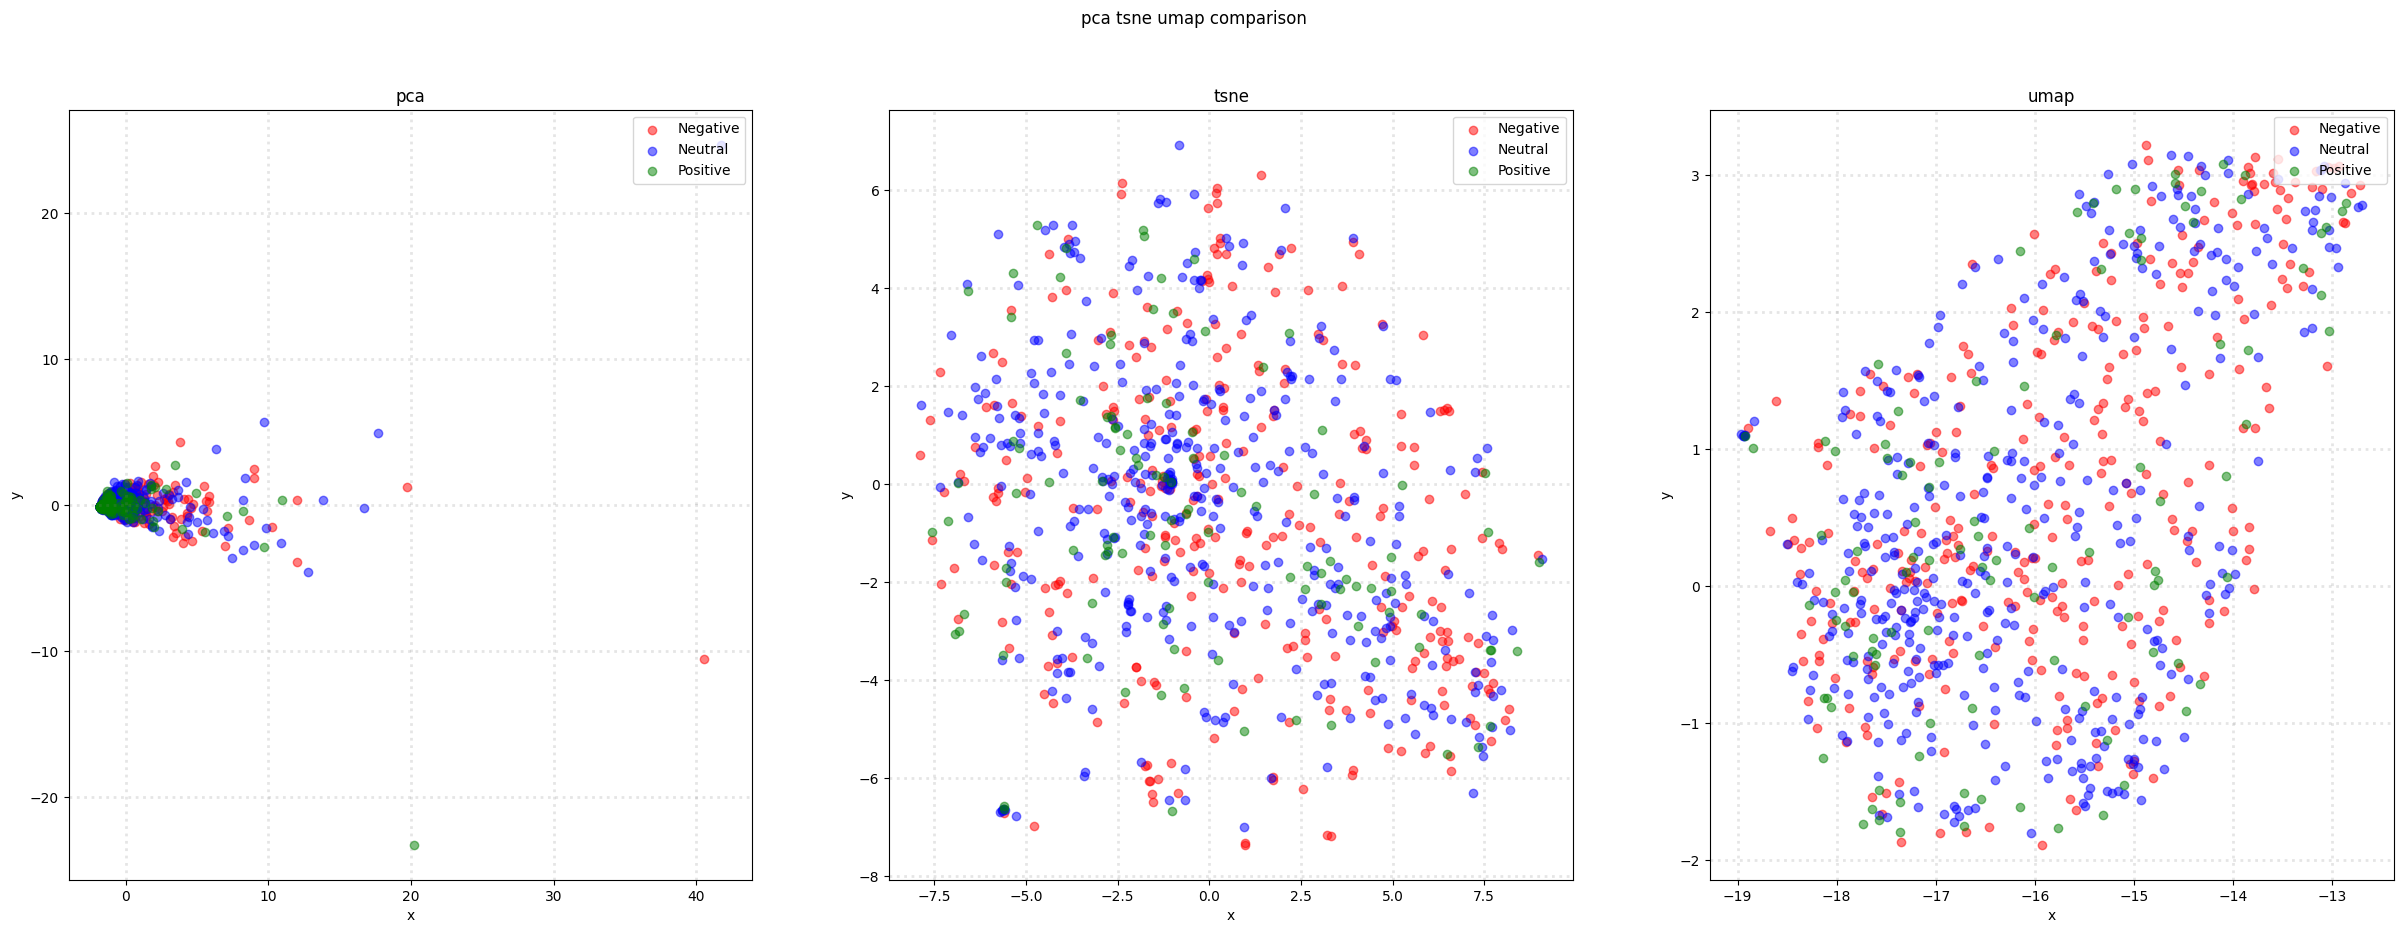

In [31]:
col = ['red', 'blue', 'green']
categories = df['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('pca tsne umap comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    # need to reset index of df['sentiment_name'] to match X_reduced
    sentiment_labels = df['sentiment_name'].reset_index(drop=True)
    for c, category in zip(col, categories):
        xs = X_reduced[sentiment_labels == category].T[0]
        ys = X_reduced[sentiment_labels == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category, alpha=0.5)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='upper right')

plot_scatter(axes[0], X_pca_tdm, 'pca')
plot_scatter(axes[1], X_tsne_tdm, 'tsne')
plot_scatter(axes[2], X_umap_tdm, 'umap')

plt.show()

PCA

the 2d plots show everything is just a big mess
pca is a clump, tsne and umap try to make groups but they are all mixed together
this is normal for just word counts

now let's try with the augmented data (words + patterns)

In [32]:
X_pca_aug = PCA(n_components=2, random_state=42).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2, random_state=42).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2, random_state=42).fit_transform(augmented_df.values)

/workspaces/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



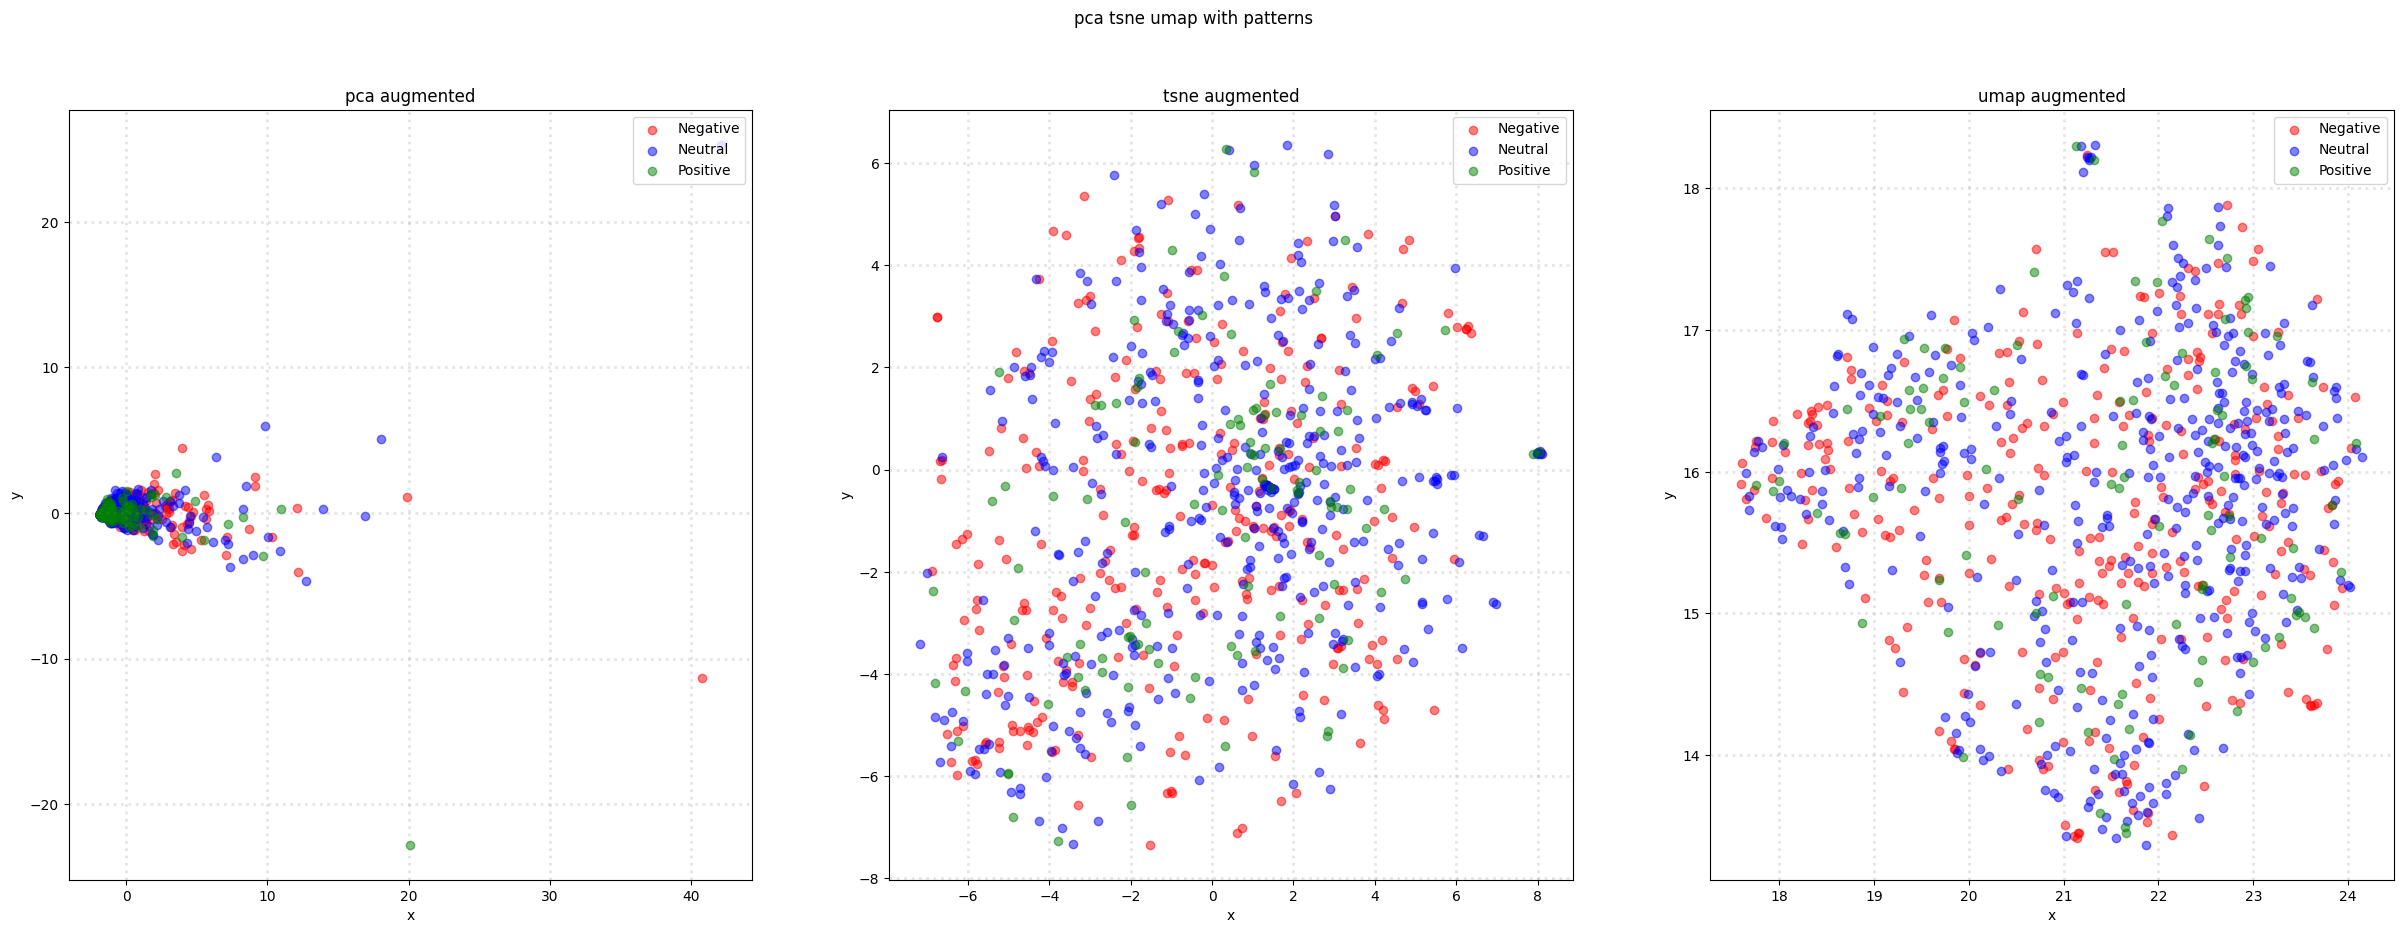

In [33]:
# col and categories are the same as before

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('pca tsne umap with patterns')

# we can reuse the plot_scatter function
plot_scatter(axes[0], X_pca_aug, 'pca augmented')
plot_scatter(axes[1], X_tsne_aug, 'tsne augmented')
plot_scatter(axes[2], X_umap_aug, 'umap augmented')

plt.show()

Augmented PCA

still looks like a mess
the patterns didn't really help separate the groups in 2d
but maybe in 3d it's better

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

/workspaces/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



3D reduction complete. Now plotting...


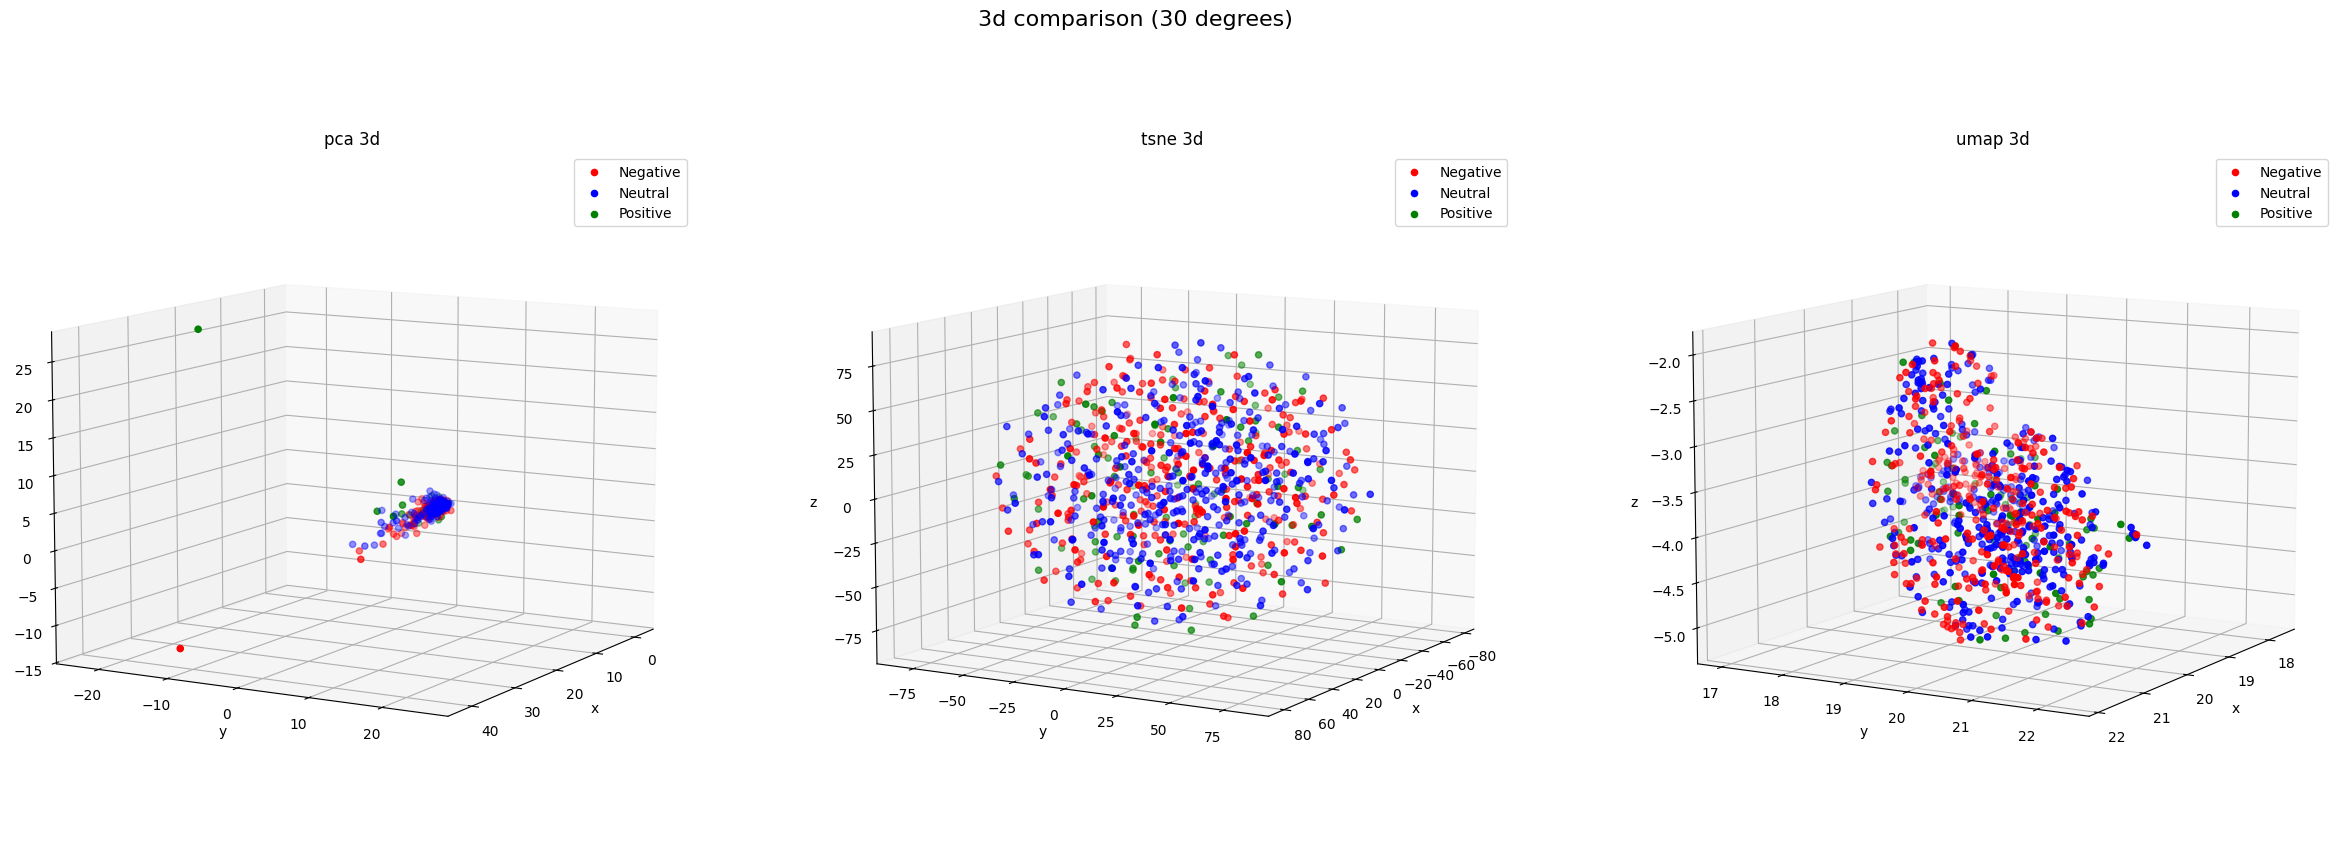

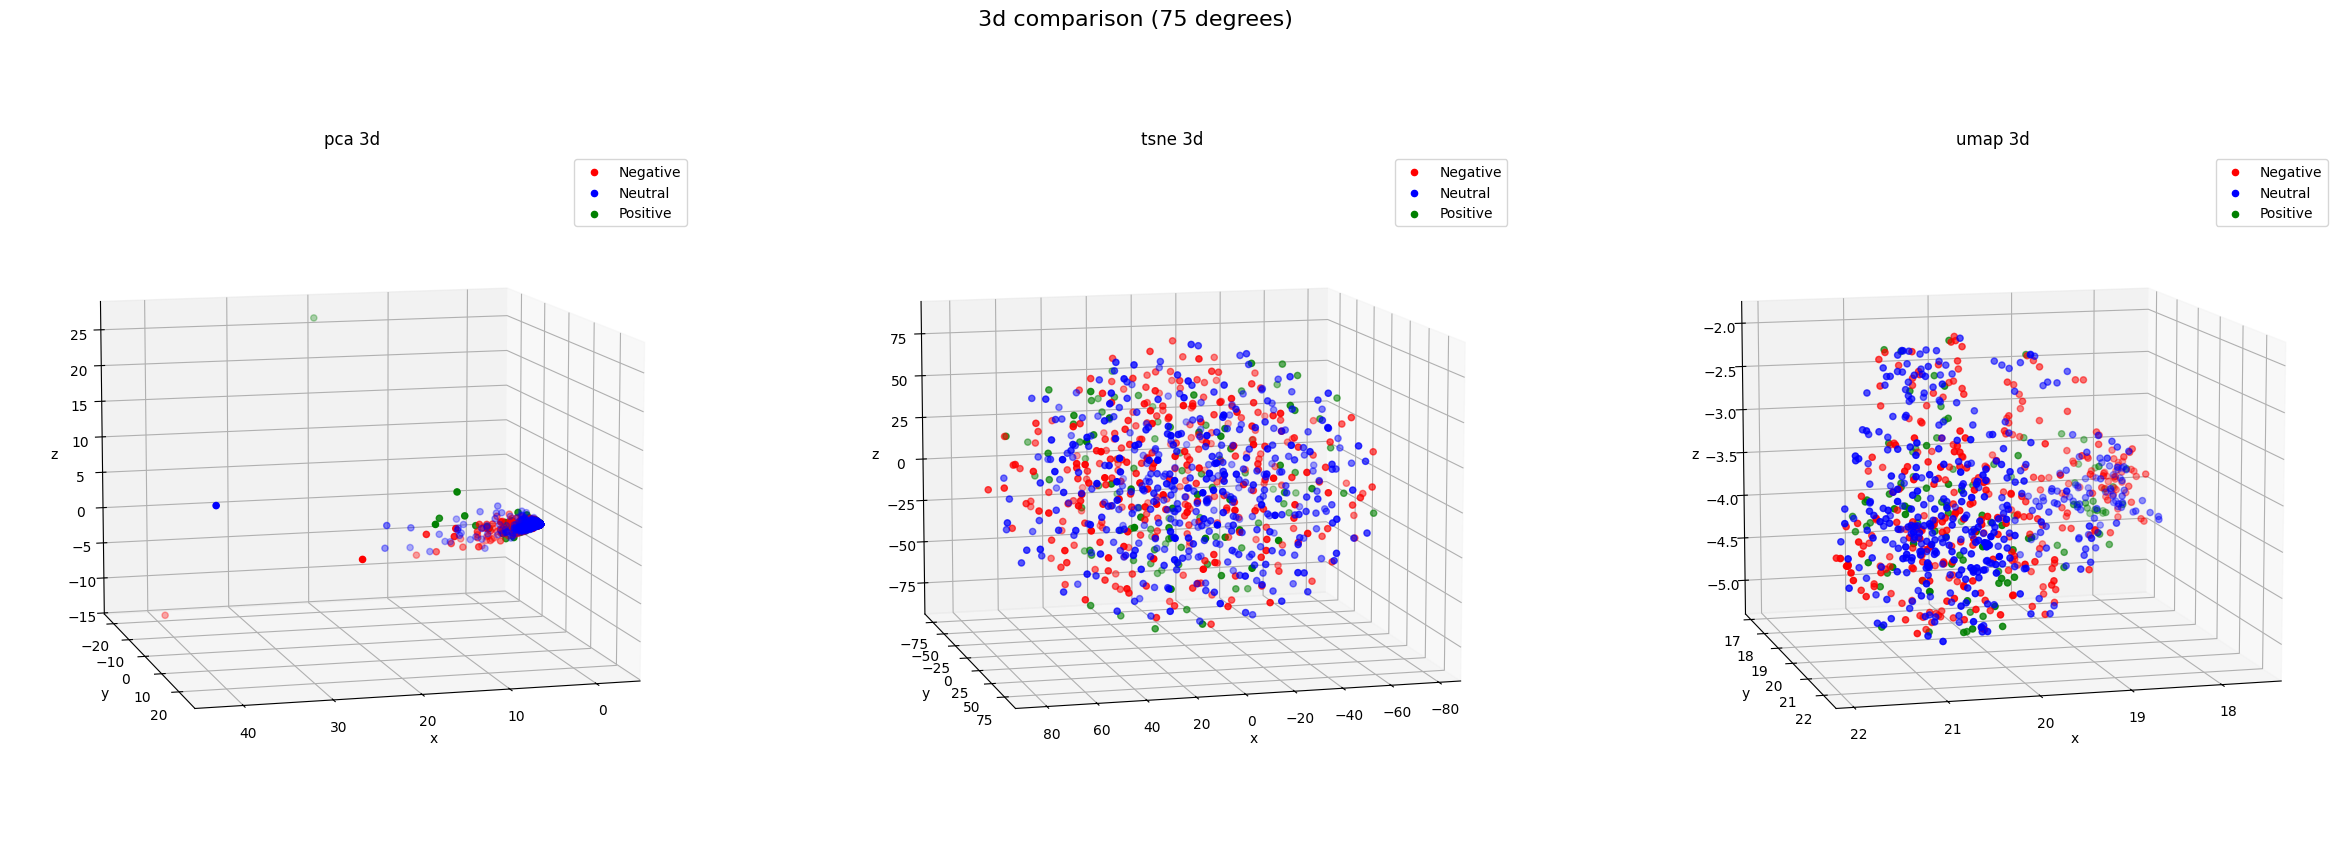

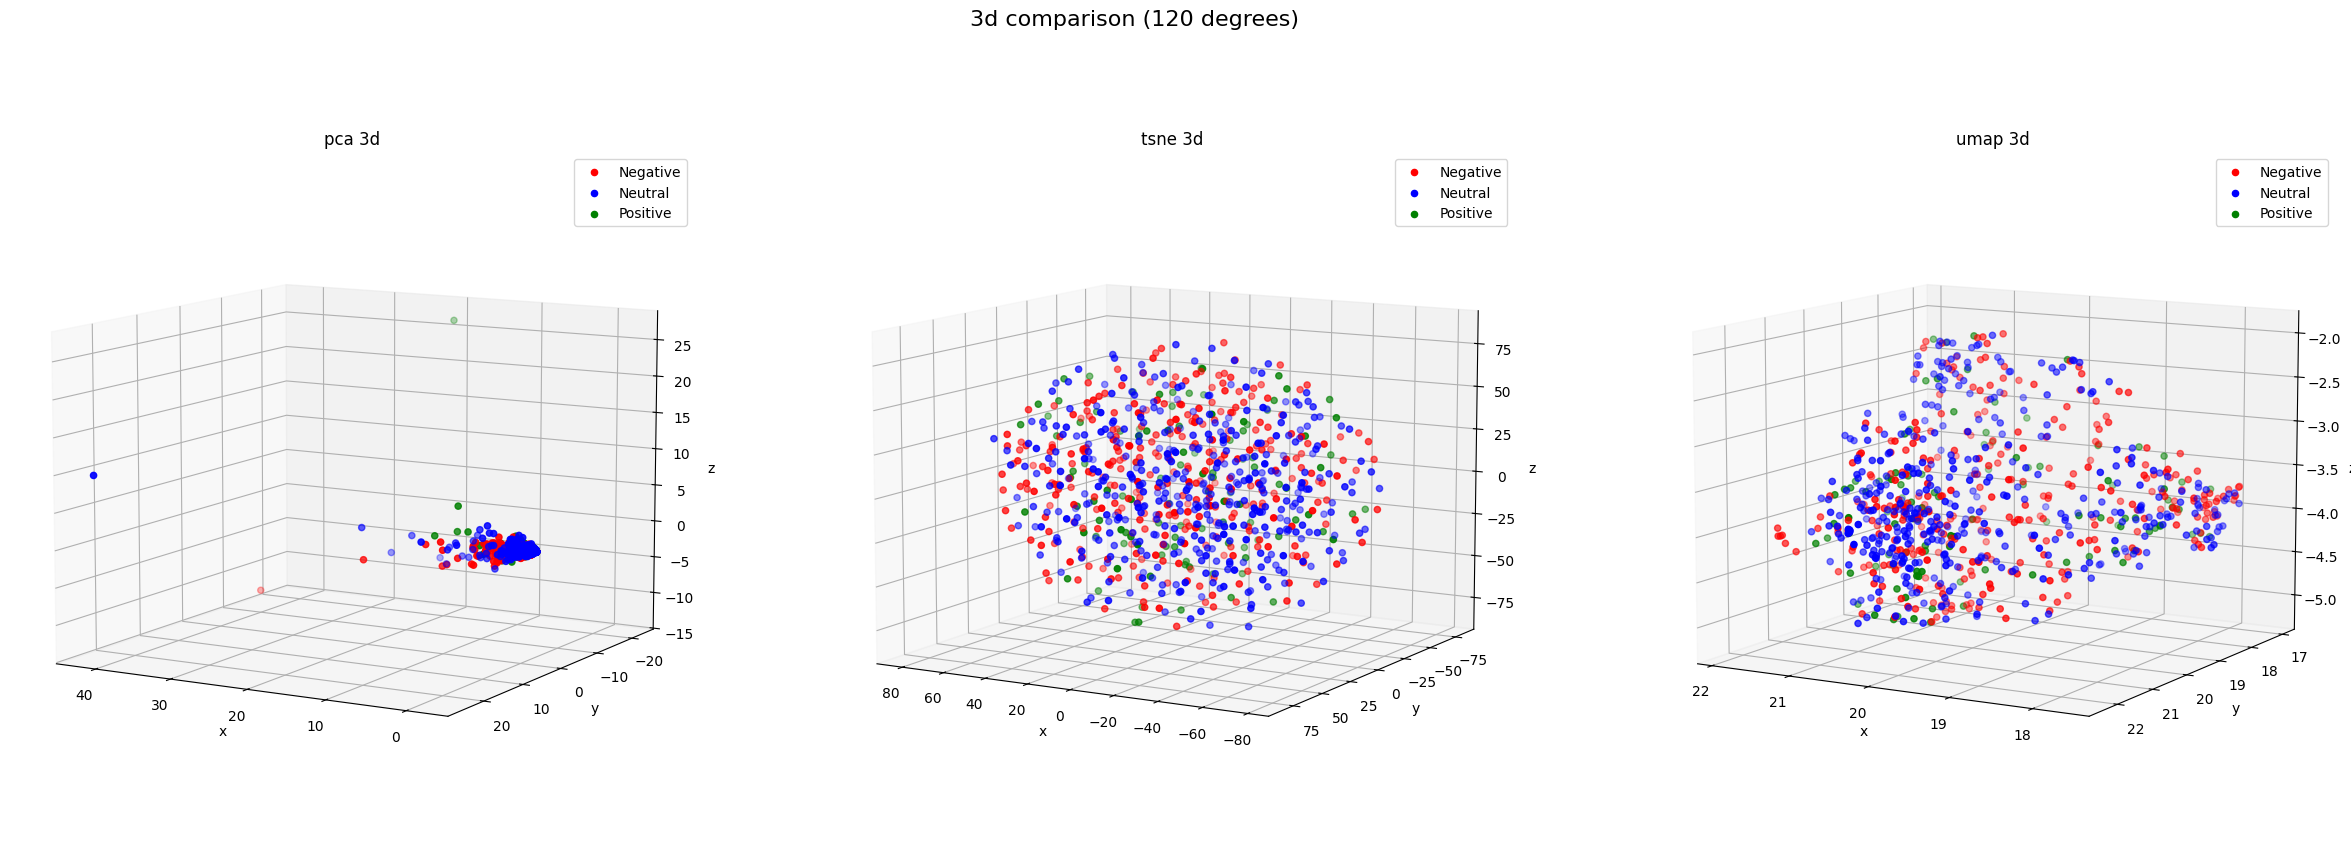

In [34]:
#Answer Here

import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# run the 3d reductions
X_pca_aug_3d = PCA(n_components=3, random_state=42).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3, perplexity=30, random_state=42).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(augmented_df.values)

print("3D reduction complete. Now plotting...")

# get the colors and categories we used before
col = ['red', 'blue', 'green']
categories = df['sentiment_name'].unique()
sentiment_labels_3d = df['sentiment_name'].reset_index(drop=True)

# function to make the plots, so we dont copy paste 3 times
def plot_3d_grid(X_pca, X_tsne, X_umap, angle):
    
    fig = plt.figure(figsize=(30, 10))
    fig.suptitle(f'3d comparison ({angle} degrees)', fontsize=16)

    # pca plot
    ax_pca = fig.add_subplot(131, projection='3d')
    ax_pca.view_init(elev=10, azim=angle) # set the camera angle
    for c, category in zip(col, categories):
        xs = X_pca[sentiment_labels_3d == category, 0]
        ys = X_pca[sentiment_labels_3d == category, 1]
        zs = X_pca[sentiment_labels_3d == category, 2]
        ax_pca.scatter(xs, ys, zs, c=c, marker='o', label=category)
    ax_pca.set_title('pca 3d')
    ax_pca.set_xlabel('x'); ax_pca.set_ylabel('y'); ax_pca.set_zlabel('z') # simple labels
    ax_pca.legend()

    # t-sne plot
    ax_tsne = fig.add_subplot(132, projection='3d')
    ax_tsne.view_init(elev=10, azim=angle) # set the camera angle
    for c, category in zip(col, categories):
        xs = X_tsne[sentiment_labels_3d == category, 0]
        ys = X_tsne[sentiment_labels_3d == category, 1]
        zs = X_tsne[sentiment_labels_3d == category, 2]
        ax_tsne.scatter(xs, ys, zs, c=c, marker='o', label=category)
    ax_tsne.set_title('tsne 3d')
    ax_tsne.set_xlabel('x'); ax_tsne.set_ylabel('y'); ax_tsne.set_zlabel('z') # simple labels
    ax_tsne.legend()

    # umap plot
    ax_umap = fig.add_subplot(133, projection='3d')
    ax_umap.view_init(elev=10, azim=angle) # set the camera angle
    for c, category in zip(col, categories):
        xs = X_umap[sentiment_labels_3d == category, 0]
        ys = X_umap[sentiment_labels_3d == category, 1]
        zs = X_umap[sentiment_labels_3d == category, 2]
        ax_umap.scatter(xs, ys, zs, c=c, marker='o', label=category)
    ax_umap.set_title('umap 3d')
    ax_umap.set_xlabel('x'); ax_umap.set_ylabel('y'); ax_umap.set_zlabel('z') # simple labels
    ax_umap.legend()
    
    plt.show()

# now plot everything 3 times with different angles
plot_3d_grid(X_pca_aug_3d, X_tsne_aug_3d, X_umap_aug_3d, angle=30)

plot_3d_grid(X_pca_aug_3d, X_tsne_aug_3d, X_umap_aug_3d, angle=75)

plot_3d_grid(X_pca_aug_3d, X_tsne_aug_3d, X_umap_aug_3d, angle=120)

In [35]:
"""
PCA
---
This one is just a total mess
Its a single big ball of dots and all three colors are completely mixed together
Changing the camera angle doesnt help, it just looks like a blob from every side

t-SNE
---
This one is also really bad, just like the PCA plot
It spreads the data out a little bit more, but the clusters are super entangled
All the points are still heavily mixed and overlap a lot
You cant tell the three categories apart in this plot either

UMAP
---
UMAP did a little bit better, but its still not great

Conclusion
---
For this sentiment data, even 3D plots dont really work very well
This data seems way harder to separate
"""

'\nPCA\n---\nThis one is just a total mess\nIts a single big ball of dots and all three colors are completely mixed together\nChanging the camera angle doesnt help, it just looks like a blob from every side\n\nt-SNE\n---\nThis one is also really bad, just like the PCA plot\nIt spreads the data out a little bit more, but the clusters are super entangled\nAll the points are still heavily mixed and overlap a lot\nYou cant tell the three categories apart in this plot either\n\nUMAP\n---\nUMAP did a little bit better, but its still not great\n\nConclusion\n---\nFor this sentiment data, even 3D plots dont really work very well\nThis data seems way harder to separate\n'

Discretization and Binarization

In [36]:
# binarize the 'label' column
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.label)
# need to handle sparse output if it occurs, though for 3 classes it shouldn't
bin_category_transformed = mlb.transform(df['label'])
df['bin_category'] = [list(row) for row in bin_category_transformed]
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label,sentiment_name,unigrams,pattern_tokens,bin_category
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,Negative,"[Calls, on, retards]","{calls, retards, on}","[1, 0, 0]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,Neutral,"[Stunt, as, in, like, why, did, they, even, ma...","{about, company, no, it, first, why, should, a...","[0, 1, 0]"
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]","{seeing, lots, the, ticker, of, red, in}","[0, 1, 0]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,Positive,"[Vision, Marine, Technologies, Inc., is, rewri...","{edge, of, just, octillion, cutting, the, gene...","[0, 0, 1]"
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,Negative,"[He, didn, ’, t, say, thank, you, .]","{say, didn, you, thank, he}","[1, 0, 0]"


### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [37]:
# Answer here

from sklearn import preprocessing

# create a new binarizer for this column
mlb_name = preprocessing.LabelBinarizer()

# do the fit and transform on 'sentiment_name'
mlb_name.fit(df.sentiment_name)
bin_category_name_transformed = mlb_name.transform(df.sentiment_name)
df['bin_category_name'] = [list(row) for row in bin_category_name_transformed]

# print the first few rows to compare
# also show the original 'bin_category'
print("Comparing the two binarized columns:")
print(df[['label', 'sentiment_name', 'bin_category', 'bin_category_name']].head(10))

# show the classes. 
print("\nBinarizer classes found in 'sentiment_name':")
print(mlb_name.classes_)

Comparing the two binarized columns:
   label sentiment_name bin_category bin_category_name
0   -1.0       Negative    [1, 0, 0]         [1, 0, 0]
1    0.0        Neutral    [0, 1, 0]         [0, 1, 0]
2    0.0        Neutral    [0, 1, 0]         [0, 1, 0]
3    1.0       Positive    [0, 0, 1]         [0, 0, 1]
4   -1.0       Negative    [1, 0, 0]         [1, 0, 0]
5    0.0        Neutral    [0, 1, 0]         [0, 1, 0]
6   -1.0       Negative    [1, 0, 0]         [1, 0, 0]
7    0.0        Neutral    [0, 1, 0]         [0, 1, 0]
8    1.0       Positive    [0, 0, 1]         [0, 0, 1]
9    1.0       Positive    [0, 0, 1]         [0, 0, 1]

Binarizer classes found in 'sentiment_name':
['Negative' 'Neutral' 'Positive']


Data Exploration

let's check cosine similarity between 3 posts

In [38]:
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# We retrieve 3 sentences for a random record
# use 'text' column so it matches the count_vect from phase 1
document_to_transform_1 = []
random_record_1 = df.iloc[10]['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[500]['text']
document_to_transform_3.append(random_record_3)

# Transform sentence with Vectorizers (using count_vect from phase 1)
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_11145/3160704246.py:38: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_11145/3160704246.py:39: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_11145/3160704246.py:40: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_11145/3160704246.py:42: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before perfo

### >>> **Exercise 20 (take home):**
Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted?

In [39]:
#Answer

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import binarize # this was in the example

# i'll pick two docs from the same category and one from a different one
# df.iloc[17] and df.iloc[18] are both 'Negative'
# df.iloc[3] is 'Neutral'

# doc 1: Negative
document_to_transform_1 = []
random_record_1 = df.iloc[17]['text']
document_to_transform_1.append(random_record_1)

# doc 2: Negative
document_to_transform_2 = []
random_record_2 = df.iloc[18]['text']
document_to_transform_2.append(random_record_2)

# doc 3: Neutral
document_to_transform_3 = []
random_record_3 = df.iloc[3]['text']
document_to_transform_3.append(random_record_3)

# just to show what we picked
print("--- Picked new documents: ---")
print(f"Doc 1 (idx 17): {df.iloc[17]['sentiment_name']}")
print(f"Doc 2 (idx 18): {df.iloc[18]['sentiment_name']}")
print(f"Doc 3 (idx 3): {df.iloc[3]['sentiment_name']}")
print("---------------------------------")

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3)

# Print results
print(f"Cosine Similarity (count) 1 and 2: {cos_sim_count_1_2}")
print(f"Cosine Similarity (count) 1 and 3: {cos_sim_count_1_3}")
print(f"Cosine Similarity (count) 2 and 3: {cos_sim_count_2_3}")

"""

The similarity between the two Negative docs was 0.204
But the similarity between one of the Negative docs (1) and the Positive doc (3) was 0.218
This is the opposite of what should happen

How to interpret this
---
This shows that our simple bag of words model (the CountVectorizer) is not very good
It just counts all the words
It doesnt know which words are important for the topic

Doc 1 (Negative) and Doc 3 (Positive) must share a lot of common, non-topic words
This makes their score higher than it should be
Even though Doc 1 and Doc 2 are both Negative, they might be talking about different negative things
So they dont share many specific negative words, and their score is lower

This just proves that this simple count method is easily confused by word choice and document style
"""

--- Picked new documents: ---
Doc 1 (idx 17): Negative
Doc 2 (idx 18): Negative
Doc 3 (idx 3): Positive
---------------------------------
Cosine Similarity (count) 1 and 2: [[0.20412415]]
Cosine Similarity (count) 1 and 3: [[0.21809807]]
Cosine Similarity (count) 2 and 3: [[0.1463641]]


'\n\nThe similarity between the two Negative docs was 0.204\nBut the similarity between one of the Negative docs (1) and the Positive doc (3) was 0.218\nThis is the opposite of what should happen\n\nHow to interpret this\n---\nThis shows that our simple bag of words model (the CountVectorizer) is not very good\nIt just counts all the words\nIt doesnt know which words are important for the topic\n\nDoc 1 (Negative) and Doc 3 (Positive) must share a lot of common, non-topic words\nThis makes their score higher than it should be\nEven though Doc 1 and Doc 2 are both Negative, they might be talking about different negative things\nSo they dont share many specific negative words, and their score is lower\n\nThis just proves that this simple count method is easily confused by word choice and document style\n'

Data Classification

try naive bayes on the plain tdm first

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = dict(df[['label', 'sentiment_name']].drop_duplicates().values)

target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# use tdm_df from earlier
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['label'], test_size=0.3, random_state=1)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5766129032258065

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5145    0.7802    0.6201        91
     Neutral     0.6900    0.5520    0.6133       125
    Positive     0.3000    0.0938    0.1429        32

    accuracy                         0.5766       248
   macro avg     0.5015    0.4753    0.4588       248
weighted avg     0.5753    0.5766    0.5551       248



### >>> **Exercise 21 (take home):**

Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df, df['label'], test_size=0.3, random_state=1)

nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

y_pred_aug = nb_classifier_aug.predict(X_test_aug)

print("Accuracy (with augmented data):", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report (with augmented data):\n", classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Accuracy (with augmented data): 0.6088709677419355

Classification Report (with augmented data):
               precision    recall  f1-score   support

    Negative     0.5581    0.7912    0.6545        91
     Neutral     0.7087    0.5840    0.6404       125
    Positive     0.3750    0.1875    0.2500        32

    accuracy                         0.6089       248
   macro avg     0.5473    0.5209    0.5150       248
weighted avg     0.6104    0.6089    0.5952       248



Classification

the naive bayes model seems to do pretty good on this data
lets try a decision tree, like in the master notebook

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['label'], test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5282258064516129

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5867    0.4681    0.5207        94
     Neutral     0.5533    0.7034    0.6194       118
    Positive     0.1739    0.1111    0.1356        36

    accuracy                         0.5282       248
   macro avg     0.4380    0.4275    0.4252       248
weighted avg     0.5109    0.5282    0.5118       248



In [43]:
X_train_aug_dt, X_test_aug_dt, y_train_aug_dt, y_test_aug_dt = train_test_split(augmented_df, df['label'], test_size=0.3, random_state=42)

dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train_aug_dt, y_train_aug_dt)

y_pred_aug_dt = dt_classifier_aug.predict(X_test_aug_dt)

print("Decision Tree Accuracy (Augmented TDM):", accuracy_score(y_test_aug_dt, y_pred_aug_dt))
print("\nClassification Report (Augmented TDM):\n", classification_report(y_test_aug_dt, y_pred_aug_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (Augmented TDM): 0.5120967741935484

Classification Report (Augmented TDM):
               precision    recall  f1-score   support

    Negative     0.5570    0.4681    0.5087        94
     Neutral     0.5473    0.6864    0.6090       118
    Positive     0.0952    0.0556    0.0702        36

    accuracy                         0.5121       248
   macro avg     0.3998    0.4034    0.3960       248
weighted avg     0.4853    0.5121    0.4928       248



## Phase 2 TF-IDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, ComplementNB

# --- Classifier 1: Word Frequency (from notebook Ex 21) ---
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(tdm_df, df['label'], test_size=0.3, random_state=42)

# use MultinomialNB for counts
nb_classifier_count = MultinomialNB()
nb_classifier_count.fit(X_train_count, y_train_count)
y_pred_count = nb_classifier_count.predict(X_test_count)

print("--- 1 Naive Bayes (Multinomial) on Word Frequency (tdm_df) ---")
print("Accuracy:", accuracy_score(y_test_count, y_pred_count))
print("\nClassification Report:\n", classification_report(y_test_count, y_pred_count, target_names=target_names, digits=4))


# --- Classifier 2: TF-IDF Features ---
tfidf_vect = TfidfVectorizer()
tfidf_matrix = tfidf_vect.fit_transform(df['text'])

# we have to use toarray() for GaussianNB
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vect.get_feature_names_out())

# split the new tf-idf data
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_df, df['label'], test_size=0.3, random_state=42)

nb_classifier_tfidf = GaussianNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

print("\n\n--- 2a Naive Bayes (Gaussian) on TF-IDF Features ---")
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf, target_names=target_names, digits=4))

# --- Classifier 2b: MultinomialNB on TF-IDF Features ---
print("\n\n--- 2b Naive Bayes (Multinomial) on TF-IDF Features ---")

nb_classifier_tfidf_multi = MultinomialNB()
nb_classifier_tfidf_multi.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf_multi = nb_classifier_tfidf_multi.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf_multi))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf_multi, target_names=target_names, digits=4))


# --- Classifier 2c: ComplementNB on TF-IDF Features ---
print("\n\n--- 2c Naive Bayes (Complement) on TF-IDF Features ---")

nb_classifier_tfidf_comp = ComplementNB()
nb_classifier_tfidf_comp.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf_comp = nb_classifier_tfidf_comp.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf_comp))
print("\nClassification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf_comp, target_names=target_names, digits=4))

--- 1 Naive Bayes (Multinomial) on Word Frequency (tdm_df) ---
Accuracy: 0.5967741935483871

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5769    0.7979    0.6696        94
     Neutral     0.6514    0.6017    0.6256       118
    Positive     0.2222    0.0556    0.0889        36

    accuracy                         0.5968       248
   macro avg     0.4835    0.4850    0.4614       248
weighted avg     0.5609    0.5968    0.5644       248



--- 2a Naive Bayes (Gaussian) on TF-IDF Features ---
Accuracy: 0.4314516129032258

Classification Report:
               precision    recall  f1-score   support

    Negative     0.5000    0.4894    0.4946        94
     Neutral     0.4870    0.4746    0.4807       118
    Positive     0.1220    0.1389    0.1299        36

    accuracy                         0.4315       248
   macro avg     0.3696    0.3676    0.3684       248
weighted avg     0.4389    0.4315    0.4350       248



--- 2b Nai

/workspaces/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/workspaces/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/workspaces/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [45]:
"""
Heres what I noticed was inefficient in the lab notebook

Inefficient Parts
---
The count vectorizer does not choose stop words, all useless words also got picked
the CountVectorizer we made didnt have a stop word list
This means useless words like the, is, a, and of were all picked as features
This makes the data super noisy

Top 5% Removal
---
The notebook tried to fix this by removing the top 5% most frequent words in each category
But this was way too aggressive and removed important words
It basically punished words for being good at defining their own category

No Lemmatization
---
The notebook never did lemmatization or stemming
This means words like run, running, and ran are all treated as different features
This makes our data have way more columns than it needs and its less smart

How to improve it
---
Use nltk.stopwords
Instead of the top 5% removal, we should have just given the CountVectorizer a proper stopword list
The notebook even imported nltk, so we could have used the english stopword list from there
This would remove words like the but keep important words like stock

Use Lemmatization
---
We should process the text with a lemmatizer (like from nltk) before we feed it to the vectorizer
This would group run, running, and ran all into just run
This would make our feature set smaller and much stronger

Use TF-IDF
---
If we use TF-IDF instead of CountVectorizer, we dont even need the Top 5% removal step
TF-IDF automatically gives a lower weight to words that appear in many documents
So it would naturally handle common words without us having to delete them
"""

'\nHeres what I noticed was inefficient in the lab notebook\n\nInefficient Parts\n---\nThe count vectorizer does not choose stop words, all useless words also got picked\nthe CountVectorizer we made didnt have a stop word list\nThis means useless words like the, is, a, and of were all picked as features\nThis makes the data super noisy\n\nTop 5% Removal\n---\nThe notebook tried to fix this by removing the top 5% most frequent words in each category\nBut this was way too aggressive and removed important words\nIt basically punished words for being good at defining their own category\n\nNo Lemmatization\n---\nThe notebook never did lemmatization or stemming\nThis means words like run, running, and ran are all treated as different features\nThis makes our data have way more columns than it needs and its less smart\n\nHow to improve it\n---\nUse nltk.stopwords\nInstead of the top 5% removal, we should have just given the CountVectorizer a proper stopword list\nThe notebook even imported nl